<a href="https://colab.research.google.com/github/BenJoshMudi/GOMYCODE.BEN/blob/main/API_Nasa_Checkpoints.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!python -m pip install requests

In [2]:
import requests
import pandas as pd
import matplotlib.pyplot as plt
from PIL import Image
from io import BytesIO

api_url = "https://api.nasa.gov/planetary/apod?api_key=OPfOLErJHlcAXTcKJS3ar1f3lW9dJrUhG0pbpI0v"
response = requests.get(api_url)
apod_data = response.json()
apod_data

{'copyright': 'Long Xin',
 'date': '2024-06-22',
 'explanation': 'Stars are forming in Lynds Dark Nebula (LDN) 1251. About 1,000 light-years away and drifting above the plane of our Milky Way galaxy, LDN 1251 is also less appetizingly known as "The Rotten Fish Nebula." The dusty molecular cloud is part of a complex of dark nebulae mapped toward the Cepheus flare region. Across the spectrum, astronomical explorations of the obscuring interstellar clouds reveal energetic shocks and outflows associated with newborn stars, including the telltale reddish glow from scattered Herbig-Haro objects hiding in the image. Distant background galaxies also lurk in the scene, almost buried behind the dusty expanse. This alluring view spans over four full moons on the sky, or 35 light-years at the estimated distance of LDN 1251.',
 'hdurl': 'https://apod.nasa.gov/apod/image/2406/LDN1251_2048.png',
 'media_type': 'image',
 'service_version': 'v1',
 'title': 'Lynds Dark Nebula 1251',
 'url': 'https://apo

In [3]:
image_url = apod_data['url']
image_title = apod_data['title']

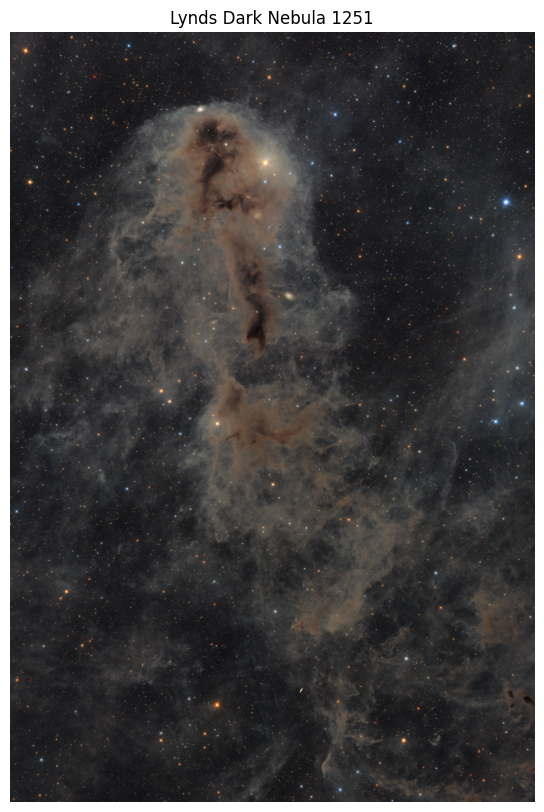

In [11]:
hdurl = apod_data['hdurl']
response = requests.get(hdurl)
hd_image = Image.open(BytesIO(response.content))

plt.figure(figsize=(10, 10))
plt.imshow(hd_image)
plt.axis('off')
plt.title(image_title)
plt.show()

In [17]:
# NeoWS API for near-earth objects
neows_api_url = "https://api.nasa.gov/neo/rest/v1/feed?&api_key=OPfOLErJHlcAXTcKJS3ar1f3lW9dJrUhG0pbpI0v"
neows_response = requests.get(neows_api_url)
neows_data = neows_response.json()
neows_data

{'links': {'next': 'http://api.nasa.gov/neo/rest/v1/feed?start_date=2024-06-29&end_date=2024-07-06&detailed=false&api_key=OPfOLErJHlcAXTcKJS3ar1f3lW9dJrUhG0pbpI0v',
  'previous': 'http://api.nasa.gov/neo/rest/v1/feed?start_date=2024-06-15&end_date=2024-06-22&detailed=false&api_key=OPfOLErJHlcAXTcKJS3ar1f3lW9dJrUhG0pbpI0v',
  'self': 'http://api.nasa.gov/neo/rest/v1/feed?start_date=2024-06-22&end_date=2024-06-29&detailed=false&api_key=OPfOLErJHlcAXTcKJS3ar1f3lW9dJrUhG0pbpI0v'},
 'element_count': 94,
 'near_earth_objects': {'2024-06-29': [{'links': {'self': 'http://api.nasa.gov/neo/rest/v1/neo/2456946?api_key=OPfOLErJHlcAXTcKJS3ar1f3lW9dJrUhG0pbpI0v'},
    'id': '2456946',
    'neo_reference_id': '2456946',
    'name': '456946 (2008 AF32)',
    'nasa_jpl_url': 'https://ssd.jpl.nasa.gov/tools/sbdb_lookup.html#/?sstr=2456946',
    'absolute_magnitude_h': 21.26,
    'estimated_diameter': {'kilometers': {'estimated_diameter_min': 0.1487835705,
      'estimated_diameter_max': 0.3326901775},
 

In [22]:
# Extract near-earth object data
asteroids = []
for data in neows_data['near_earth_objects']:  # Iterate over dates in NeoWS data
    for asteroid in neows_data['near_earth_objects'][data]:
        asteroids.append({
            'Asteroid ID': asteroid['id'],
            'Asteroid Name': asteroid['name'],
            'Minimal_Estimated_Diameter_km': asteroid['estimated_diameter']['kilometers']['estimated_diameter_min'],
            'Absolute_Magnitude': asteroid['absolute_magnitude_h'],
            'Relative_Velocity_km_s': asteroid['close_approach_data'][0]['relative_velocity']['kilometers_per_second']
        })

# Print the extracted data
for asteroid in asteroids:
    print(asteroid)

{'Asteroid ID': '2456946', 'Asteroid Name': '456946 (2008 AF32)', 'Minimal_Estimated_Diameter_km': 0.1487835705, 'Absolute_Magnitude': 21.26, 'Relative_Velocity_km_s': '14.6390943759'}
{'Asteroid ID': '3373097', 'Asteroid Name': '(2007 GC)', 'Minimal_Estimated_Diameter_km': 0.1326034968, 'Absolute_Magnitude': 21.51, 'Relative_Velocity_km_s': '9.2778472619'}
{'Asteroid ID': '3402134', 'Asteroid Name': '(2008 CL20)', 'Minimal_Estimated_Diameter_km': 0.0231502122, 'Absolute_Magnitude': 25.3, 'Relative_Velocity_km_s': '18.2095164374'}
{'Asteroid ID': '3692561', 'Asteroid Name': '(2014 TV)', 'Minimal_Estimated_Diameter_km': 0.0350392641, 'Absolute_Magnitude': 24.4, 'Relative_Velocity_km_s': '9.553820721'}
{'Asteroid ID': '3736409', 'Asteroid Name': '(2015 XR169)', 'Minimal_Estimated_Diameter_km': 0.0048367649, 'Absolute_Magnitude': 28.7, 'Relative_Velocity_km_s': '7.1852585114'}
{'Asteroid ID': '3771633', 'Asteroid Name': '(2017 FZ2)', 'Minimal_Estimated_Diameter_km': 0.0127219879, 'Absolut

In [23]:
# Convert to DataFrame and export
df = pd.DataFrame(asteroids)
df.to_csv('asteroids_data.csv', index=False)

In [24]:
df.head()

,Asteroid ID,Asteroid Name,Minimal_Estimated_Diameter_km,Absolute_Magnitude,Relative_Velocity_km_s
0,2456946,456946 (2008 AF32),0.148784,21.26,14.6390943759
1,3373097,(2007 GC),0.132603,21.51,9.2778472619
2,3402134,(2008 CL20),0.023150,25.30,18.2095164374
3,3692561,(2014 TV),0.035039,24.40,9.553820721
4,3736409,(2015 XR169),0.004837,28.70,7.1852585114
